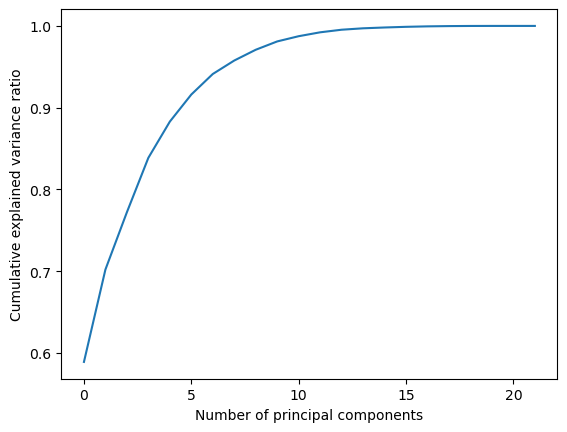

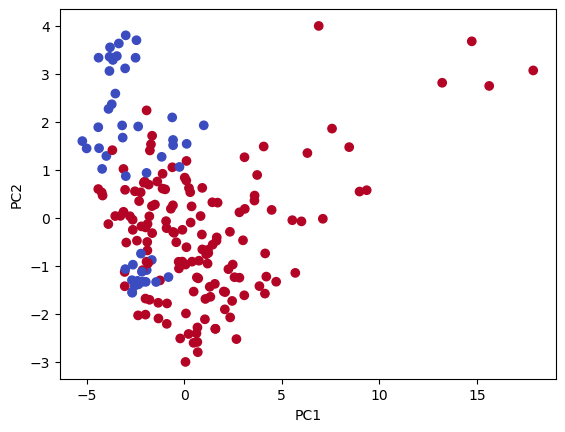

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Parkinson's Disease dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

# Separate the target variable from the features
target = data.status
features = data.drop(['name', 'status'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA()
pca.fit(scaled_features)

# Extract the explained variance ratios and eigenvalues
explained_var_ratios = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

# Plot the scree plot
plt.plot(np.cumsum(explained_var_ratios))
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative explained variance ratio")
plt.show()

# Identify the number of principal components that explain at least 90% of the variance
num_components = np.where(np.cumsum(explained_var_ratios) >= 0.9)[0][0] + 1

# Extract the principal components
principal_components = pca.transform(scaled_features)[:, :num_components]

# Create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f"PC{i}" for i in range(1, num_components+1)])

# Add the target variable to the new dataframe
principal_df['status'] = target.values

# Plot the first two principal components
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['status'], cmap='coolwarm')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [10]:
principal_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,status
0,2.096614,-1.550607,-1.265070,-0.840002,-0.726869,1.101991,1
1,4.709331,-1.334593,-1.057654,-2.139739,-1.177907,0.754064,1
2,3.852615,-1.426221,-1.824965,-1.163920,-1.265558,0.568478,1
3,4.134771,-1.581914,-1.388036,-1.463193,-1.405647,0.617057,1
4,5.689690,-1.150314,-2.421017,-1.344791,-0.849936,0.939659,1


In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Collect data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
svm = SVC()
svm.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate models
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
knn_pred = knn.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Precision:", precision_score(y_test, svm_pred, average='macro'))
print("SVM Recall:", recall_score(y_test, svm_pred, average='macro'))
print("SVM F1-score:", f1_score(y_test, svm_pred, average='macro'))

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression Precision:", precision_score(y_test, lr_pred, average='macro'))
print("Logistic Regression Recall:", recall_score(y_test, lr_pred, average='macro'))
print("Logistic Regression F1-score:", f1_score(y_test, lr_pred, average='macro'))

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Precision:", precision_score(y_test, rf_pred, average='macro'))
print("Random Forest Recall:", recall_score(y_test, rf_pred, average='macro'))
print("Random Forest F1-score:", f1_score(y_test, rf_pred, average='macro'))

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Precision:", precision_score(y_test, knn_pred, average='macro'))
print("KNN Recall:", recall_score(y_test, knn_pred, average='macro'))
print("KNN F1-score:", f1_score(y_test, knn_pred, average='macro'))


SVM Accuracy: 0.8979591836734694
SVM Precision: 0.9418604651162791
SVM Recall: 0.7727272727272727
SVM F1-score: 0.822076978939724
Logistic Regression Accuracy: 0.8979591836734694
Logistic Regression Precision: 0.9418604651162791
Logistic Regression Recall: 0.7727272727272727
Logistic Regression F1-score: 0.822076978939724
Random Forest Accuracy: 0.9387755102040817
Random Forest Precision: 0.9634146341463414
Random Forest Recall: 0.8636363636363636
Random Forest F1-score: 0.9020652898067956
KNN Accuracy: 0.8979591836734694
KNN Precision: 0.8887195121951219
KNN Recall: 0.8050239234449761
KNN F1-score: 0.8367754830113259


c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Identify variance in every column of data and apply Principal Component Analysis (PCA) to identify 5 most relevant features to model training, out of 22 attributes
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)

# Split dataset into testing and training sets, where training data is 75% of total
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42)

# Retrain SVM, logistic regression, random forest and KNN models using the reduced feature set obtained from PCA
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Evaluate the models on the testing data using accuracy, precision, recall, and F1-score
svm_pred = svm.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
svm_prec = precision_score(y_test, svm_pred)
svm_rec = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
knn_rec = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)

# Print evaluation metrics for each model
print('SVM: Accuracy - {}, Precision - {}, Recall - {}, F1-score - {}'.format(svm_acc, svm_prec, svm_rec, svm_f1))
print('Logistic Regression: Accuracy - {}, Precision - {}, Recall - {}, F1-score - {}'.format(lr_acc, lr_prec, lr_rec, lr_f1))
print('Random Forest: Accuracy - {}, Precision - {}, Recall - {}, F1-score - {}'.format(rf_acc, rf_prec, rf_rec, rf_f1))
print('KNN: Accuracy - {}, Precision - {}, Recall - {}, F1-score - {}'.format(knn_acc, knn_prec, knn_rec, knn_f1))


SVM: Accuracy - 0.9183673469387755, Precision - 0.9047619047619048, Recall - 1.0, F1-score - 0.9500000000000001
Logistic Regression: Accuracy - 0.8979591836734694, Precision - 0.8837209302325582, Recall - 1.0, F1-score - 0.9382716049382717
Random Forest: Accuracy - 0.8775510204081632, Precision - 0.9, Recall - 0.9473684210526315, F1-score - 0.9230769230769231
KNN: Accuracy - 0.9387755102040817, Precision - 0.926829268292683, Recall - 1.0, F1-score - 0.9620253164556963


c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [6]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load data from the PPPMI and UCI databases
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
X=data
X=X.drop(['status','name'],axis=1)
y=data['status']

# Resample the minority class using up-sampling to balance the dataset
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)
X_resampled = pd.concat([X[y == 0], X_resampled])
y_resampled = pd.concat([y[y == 0], y_resampled])

# Scale the data to a common range using Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Split dataset into testing and training sets, where training data is 75% of total
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.25, random_state=42)

# Train SVM, logistic regression, random forest and KNN models using the training data
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the models on the testing data using accuracy, precision, recall, and F1-score
svm_preds = svm.predict(X_test)
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
knn_preds = knn.predict(X_test)

print('SVM: Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1-Score: {:.3f}'.format(
    accuracy_score(y_test, svm_preds),
    precision_score(y_test, svm_preds),
    recall_score(y_test, svm_preds),
    f1_score(y_test, svm_preds)
))

print('Logistic Regression: Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1-Score: {:.3f}'.format(
    accuracy_score(y_test, lr_preds),
    precision_score(y_test, lr_preds),
    recall_score(y_test, lr_preds),
    f1_score(y_test, lr_preds)
))

print('Random Forest: Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1-Score: {:.3f}'.format(
    accuracy_score(y_test, rf_preds),
    precision_score(y_test, rf_preds),
    recall_score(y_test, rf_preds),
    f1_score(y_test, rf_preds)
))

print('KNN: Accuracy: {:.3f}, Precision: {:.3f}, Recall: {:.3f}, F1-Score: {:.3f}'.format(
    accuracy_score(y_test, knn_preds),
    precision_score(y_test, knn_preds),
    recall_score(y_test, knn_preds),
    f1_score(y_test, knn_preds)
))


SVM: Accuracy: 0.917, Precision: 1.000, Recall: 0.818, F1-Score: 0.900
Logistic Regression: Accuracy: 0.875, Precision: 0.900, Recall: 0.818, F1-Score: 0.857
Random Forest: Accuracy: 1.000, Precision: 1.000, Recall: 1.000, F1-Score: 1.000
KNN: Accuracy: 0.875, Precision: 0.900, Recall: 0.818, F1-Score: 0.857


c:\Users\mailt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1